<a href="https://colab.research.google.com/github/Riad6430/DataSet/blob/main/cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Start")

Start


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile

In [4]:
dts='/content/drive/MyDrive/DataSet/train.zip'

In [5]:
with ZipFile(dts,'r') as zip:
  zip.extractall()
  print("Dataset Extracted")

Dataset Extracted


In [6]:
import os
print(os.getcwd())

/content


In [7]:
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
dirs_count=len(dirs)
print("Number of images:",file_count,dirs_count,path)

Number of images: 20000 0 /content/train


In [8]:
file_list=os.listdir("/content/train")
print(file_list)
print(file_count)

['dog.590.jpg', 'cat.6502.jpg', 'cat.698.jpg', 'dog.2721.jpg', 'dog.10301.jpg', 'cat.2956.jpg', 'dog.12420.jpg', 'dog.7150.jpg', 'cat.5313.jpg', 'cat.9413.jpg', 'cat.4762.jpg', 'dog.1039.jpg', 'dog.8251.jpg', 'dog.7309.jpg', 'cat.418.jpg', 'cat.507.jpg', 'dog.4761.jpg', 'cat.12240.jpg', 'dog.9261.jpg', 'cat.2574.jpg', 'dog.579.jpg', 'cat.2038.jpg', 'dog.3637.jpg', 'cat.3934.jpg', 'dog.7592.jpg', 'dog.11103.jpg', 'cat.1363.jpg', 'cat.2610.jpg', 'cat.1943.jpg', 'dog.10476.jpg', 'dog.5349.jpg', 'cat.4723.jpg', 'dog.2272.jpg', 'dog.4680.jpg', 'cat.4548.jpg', 'dog.8141.jpg', 'dog.5827.jpg', 'dog.11492.jpg', 'dog.5704.jpg', 'dog.4746.jpg', 'cat.3686.jpg', 'dog.5044.jpg', 'dog.8697.jpg', 'dog.11967.jpg', 'cat.1308.jpg', 'dog.11627.jpg', 'cat.6511.jpg', 'cat.7078.jpg', 'cat.7991.jpg', 'dog.11678.jpg', 'dog.4128.jpg', 'dog.8900.jpg', 'dog.11162.jpg', 'dog.3525.jpg', 'cat.3357.jpg', 'cat.3067.jpg', 'cat.6152.jpg', 'dog.3517.jpg', 'cat.1992.jpg', 'cat.10440.jpg', 'dog.4542.jpg', 'dog.5539.jpg', '

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

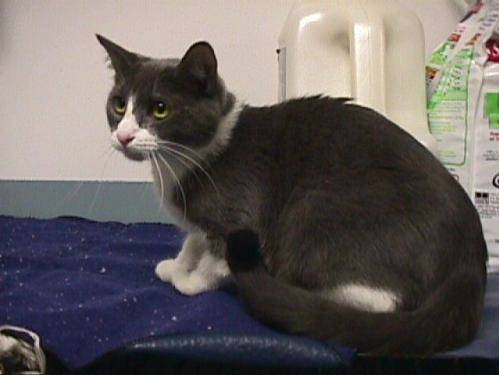

In [10]:
import cv2
img1 = cv2.imread("/content/train/cat.4.jpg")
cv2_imshow(img1) #OpenCV দিয়ে ছবি দেখানোর জন্য (Colab এ)

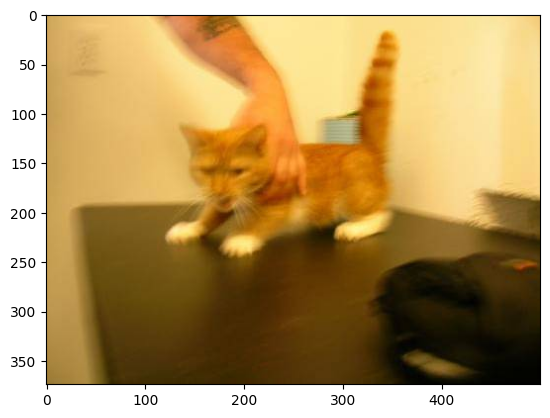

In [11]:
img=mpimg.imread('/content/train/cat.0.jpg')
plt.imshow(img) #ছবি লোড ও গ্রাফ আকারে দেখানোর জন্য

In [12]:
dog_count=0
cat_count=0
for pic in file_list:
  name=pic[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1
print("Number of dogs:",dog_count)
print("Number of cats:",cat_count)

Number of dogs: 10000
Number of cats: 10000


In [13]:
if not os.path.exists('/content/Image_resized'):
  os.mkdir('/content/Image_resized')
os.listdir('/content')

['.config', 'drive', 'train', 'Image_resized', 'sample_data']

In [14]:
mainFolder='/content/train'
resizedFolder='/content/Image_resized'

In [15]:
for i in range (20000):
  file_name=os.listdir(mainFolder)[i]
  imagePath= mainFolder+'/'+file_name

  img=Image.open(imagePath)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newPath=resizedFolder+'/'+file_name
  img.save(newPath)

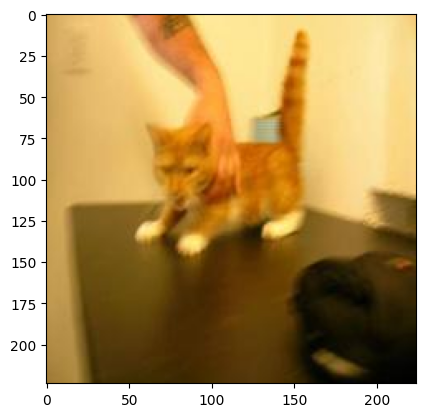

In [16]:
img=mpimg.imread('/content/Image_resized/cat.0.jpg')
plt.imshow(img)

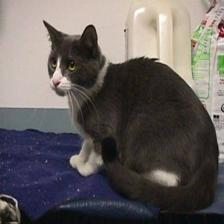

In [17]:
img2=cv2.imread('/content/Image_resized/cat.4.jpg')
cv2_imshow(img2)

In [18]:
path,dirs,files=next(os.walk('/content/Image_resized'))
file_size=len(files)
print(file_size)

20000


In [19]:
#dog=1
#cat=0

labels=[]
file_path=os.listdir('/content/Image_resized')
for i in range(file_size):
  pic_path=file_path[i]
  label=pic_path[0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [20]:
values,count=np.unique(labels,return_counts=True)
print(values)
print(count)

[0 1]
[10000 10000]


In [21]:
import glob

In [22]:
image_dir='/content/Image_resized'
image_extension=['jpg','png']
files=[]
[files.extend(glob.glob(image_dir+'/*.'+e))for e in image_extension]
dog_cat_img=np.asarray([cv2.imread(file)for file in files])


In [23]:
print(dog_cat_img)

[[[[105 145 174]
   [104 144 173]
   [ 95 135 164]
   ...
   [ 87  50  36]
   [ 92  45  41]
   [ 98  47  45]]

  [[116 156 185]
   [113 153 182]
   [103 143 172]
   ...
   [ 92  56  38]
   [ 98  55  38]
   [101  55  37]]

  [[106 146 175]
   [105 145 174]
   [102 142 171]
   ...
   [ 93  61  32]
   [103  68  25]
   [105  68  18]]

  ...

  [[ 33  54  81]
   [ 52  73 100]
   [ 54  76 101]
   ...
   [ 20  26  31]
   [ 28  32  37]
   [ 33  36  40]]

  [[ 69  88 115]
   [ 82 101 128]
   [ 62  84 109]
   ...
   [ 28  34  39]
   [ 24  28  33]
   [ 21  24  28]]

  [[101 120 147]
   [102 121 148]
   [ 99 121 146]
   ...
   [ 14  20  25]
   [ 22  26  31]
   [ 34  37  41]]]


 [[[180 189 226]
   [180 189 226]
   [182 189 228]
   ...
   [134 175 208]
   [141 179 213]
   [141 179 213]]

  [[180 189 226]
   [180 189 226]
   [181 188 227]
   ...
   [134 175 208]
   [141 179 213]
   [142 180 214]]

  [[180 189 227]
   [180 189 227]
   [182 189 228]
   ...
   [135 176 209]
   [142 180 214]
   [142 180

In [24]:
dog_cat_img.shape

(20000, 224, 224, 3)

In [25]:
x= dog_cat_img
y= np.asarray(labels)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train